In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os

In [2]:
# define gaussians
means = [[0.74507886, 0.3602802 ],
        [0.40147605, 0.06139579],
        [0.94162198, 0.46722697],
        [0.79110703, 0.8973808 ],
        [0.64732527, 0.07095655],
        [0.10083943, 0.31935057],
        [0.24929806, 0.60499613],
        [0.11377013, 0.42598647],
        [0.85163671, 0.26495608],
        [0.18439795, 0.31438099]]
A = 0.1
sig = 0.1

In [3]:
def get_energy(y0, x, y, px, py):
    
    # initialization
    H_0 = 1/2
    H_curr = (px**2+py**2)/2
    
    # initial conditions
    x0 = 0
    
    # loop throuh means
    for i in means:
        muX1 = i[0]
        muY1 = i[1]
        H_0 += -A*np.exp(-(1/(2*sig**2))*((x0-muX1)**2+(y0-muY1)**2))
        H_curr += -A*np.exp(-(1/(2*sig**2))*((x-muX1)**2+(y-muY1)**2))
        
    return H_0, H_curr

In [4]:
def get_energy_dicts(pred_dict):
    
    H_0_dict = {}
    H_curr_dict = {}

    for y0 in pred_dict.keys():

        # get rays predictions
        x_pred = pred_dict[y0]['$\\hat{x}$']
        y_pred = pred_dict[y0]['$\\hat{y}$']
        px_pred = pred_dict[y0]['$\\hat{p_x}$']
        py_pred = pred_dict[y0]['$\\hat{p_y}$']

        # get energy metrics
        H_0, H_curr = get_energy(y0, x_pred, y_pred, px_pred, py_pred)

        # add to dictionaries
        H_0_dict[y0] = H_0
        H_curr_dict[y0] = H_curr
        
    return H_0_dict, H_curr_dict

In [5]:
colors = cm.rainbow(np.linspace(0, 1, 11))
plt.rc('axes', titlesize=20, labelsize=20)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rcParams['text.usetex'] = True

def plot_energy(H_0_dict, H_curr_dict, save=False):
    fig, ax = plt.subplots(figsize=(12,9))
    for i, y0 in enumerate(H_0_dict.keys()):
        H_0 = H_0_dict[y0]
        H_curr = H_curr_dict[y0]
        c = colors[i]
        ax.hlines(y=H_0, xmin=0, xmax=len(H_curr), color='black', linestyle='dashed', zorder=1)
        ax.plot(range(len(H_curr)), H_curr, zorder=2, alpha=0.7)
    ax.set_xlabel("$t$")
    ax.set_ylabel("Energy")
    if save:
        plt.savefig("energy.png", dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [6]:
rays = "/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/runs/RAYS_run"

## Base training

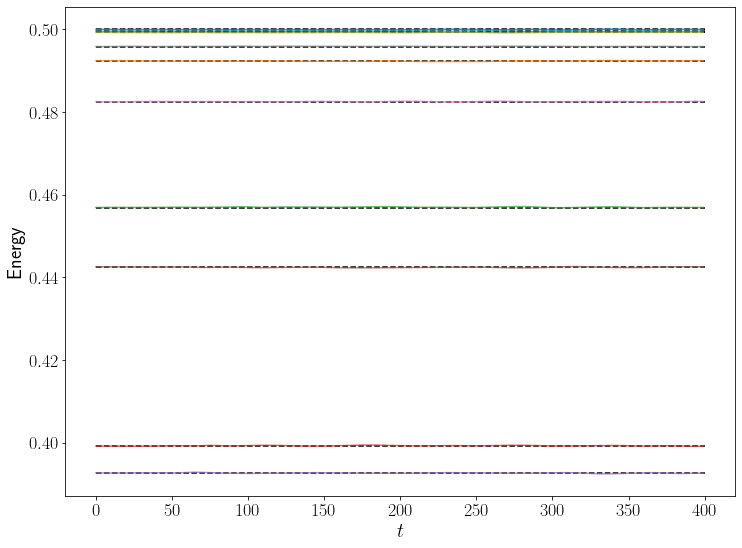

In [9]:
# get the base predictions
base_pred_dict = np.load(os.path.join(rays, "pred_dict_base.npy"), allow_pickle=True)[()]

# get the energy dictionaries
H_0_dict, H_curr_dict = get_energy_dicts(base_pred_dict)

# plot the results
plot_energy(H_0_dict, H_curr_dict, save=True)

## Transfer learning

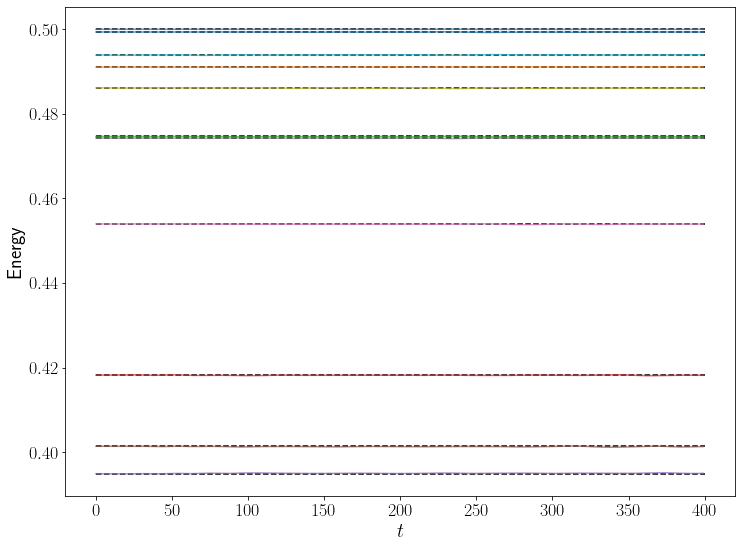

In [8]:
# get the transfer learning predictions
transfer_pred_dict = np.load(os.path.join(rays, "pred_dict_transfer11.npy"), allow_pickle=True)[()]

# get the energy dictionaries
H_0_dict, H_curr_dict = get_energy_dicts(transfer_pred_dict)

# plot the results
plot_energy(H_0_dict, H_curr_dict, save=True)